In [1]:
library(pacman)

# Use pacman to load the packages
p_load(car)
p_load(dplyr)
p_load(tidyverse, VIM, mice, Hmisc, 
               DMwR, naniar)
p_load(stargazer)
p_load(openxlsx)
p_load(here)
p_load(rio)
p_load(ggplot2)
p_load(BSDA)
p_load(corrplot)
p_load(caTools)
p_load(keras)
p_load(reticulate)
p_load(readr)
p_load(writexl)
p_load(stringr)


In [2]:
library(caTools)

In [8]:
py_install("tensorflow")

+ "C:/Users/angme/anaconda3/condabin/conda.bat" "install" "--yes" "--prefix" "C:/Users/angme/anaconda3" "-c" "conda-forge" "tensorflow"



Import File

In [3]:
data = read.csv(here("dataSources", "videoGames", "video game sales titles - amc.csv"))
attach(data)

In [4]:
# Check the data
str(data)
summary(data)
names(data)
head(data, 5)

'data.frame':	7623 obs. of  23 variables:
 $ Rank          : int  2 3 5 7 8 10 13 18 19 23 ...
 $ Title         : chr  "Mario Kart 8 Deluxe" "Animal Crossing: New Horizons" "Counter-Strike: Global Offensive" "PLAYERUNKNOWN'S BATTLEGROUNDS" ...
 $ Console       : chr  "NS" "NS" "PC" "PC" ...
 $ Publisher     : chr  "Nintendo" "Nintendo" "Valve" "PUBG Corporation" ...
 $ Developer     : chr  "Nintendo EPD" "Nintendo" "Valve Corporation" "PUBG Corporation" ...
 $ Genre         : chr  "Racing" "Simulation" "Shooter" "Shooter" ...
 $ ReleaseYear   : int  2017 2020 2012 2017 2010 2018 2017 2017 2019 2011 ...
 $ ReleaseQuarter: int  2 1 3 4 4 3 1 4 4 2 ...
 $ ReleaseMonth  : int  4 3 8 12 10 7 3 10 11 5 ...
 $ ReleaseWeek   : int  17 12 34 51 41 28 9 43 46 21 ...
 $ ReleaseDay    : int  6 6 3 5 3 5 6 6 6 2 ...
 $ ReleaseWeekend: chr  "Weekend" "Weekend" "Weekday" "Weekday" ...
 $ EndOfMonth    : chr  "End of month" "End of month" "End of month" "End of month" ...
 $ TotalSales    : int  55460

      Rank          Title             Console           Publisher        
 Min.   :    2   Length:7623        Length:7623        Length:7623       
 1st Qu.: 5416   Class :character   Class :character   Class :character  
 Median :11084   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10574                                                           
 3rd Qu.:15858                                                           
 Max.   :19944                                                           
                                                                         
  Developer            Genre            ReleaseYear   ReleaseQuarter 
 Length:7623        Length:7623        Min.   :2010   Min.   :1.000  
 Class :character   Class :character   1st Qu.:2011   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :2013   Median :3.000  
                                       Mean   :2014   Mean   :2.558  
                                       3rd Qu.:2016   3rd 

[1] "Rank"           "Title"          "Console"        "Publisher"     
 [5] "Developer"      "Genre"          "ReleaseYear"    "ReleaseQuarter"
 [9] "ReleaseMonth"   "ReleaseWeek"    "ReleaseDay"     "ReleaseWeekend"
[13] "EndOfMonth"     "TotalSales"     "NASales"        "PALSales"      
[17] "JapanSales"     "OtherSales"     "ReleaseDate"    "LastUpdate"    
[21] "VGChartzScore"  "CriticScore"    "UserScore"

,Rank,Title,Console,Publisher,Developer,Genre,ReleaseYear,ReleaseQuarter,ReleaseMonth,ReleaseWeek,⋯,TotalSales,NASales,PALSales,JapanSales,OtherSales,ReleaseDate,LastUpdate,VGChartzScore,CriticScore,UserScore
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,2,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,Racing,2017,2,4,17,⋯,55460000,NA,NA,NA,NA,28/4/2017,11/19/2018,NA,9.3,NA
2,3,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,Simulation,2020,1,3,12,⋯,42790000,NA,NA,NA,NA,20/3/2020,4/11/2020,8.0,NA,NA
3,5,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,Shooter,2012,3,8,34,⋯,40000000,NA,NA,NA,NA,21/8/2012,3/26/2019,NA,NA,NA
4,7,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,Shooter,2017,4,12,51,⋯,36600000,NA,NA,NA,NA,21/12/2017,4/29/2019,NA,NA,NA
5,8,Minecraft,PC,Mojang,Mojang AB,Misc,2010,4,10,41,⋯,33150000,NA,NA,NA,NA,5/10/2010,8/5/2018,8.8,10.0,NA


In [5]:
########################################################
# data type
# set the variables to factors (categorical data)
data <- data %>%
  mutate(
    Console = as.factor(Console),
    Publisher = as.factor(Publisher),
    Developer = as.factor(Developer),
    Genre = as.factor(Genre),
    ReleaseWeekend = as.factor(ReleaseWeekend),
    EndOfMonth = as.factor(EndOfMonth),
    TotalSales = as.numeric(TotalSales)
  )

data ['NASales'] = NULL
data ['PALSales'] = NULL
data ['JapanSales'] = NULL
data ['OtherSales'] = NULL
data ['ReleaseDate'] = NULL
data ['LastUpdate'] = NULL
data ['VGChartzScore'] = NULL
data ['CriticScore'] = NULL
data ['UserScore'] = NULL

In [6]:
########################################################
# Calculate YearsSinceRelease
data$YearsSinceRelease <- 2023 - data$ReleaseYear

In [68]:
head(data,5)

,Rank,Title,Console,Publisher,Developer,Genre,ReleaseYear,ReleaseQuarter,ReleaseMonth,ReleaseWeek,ReleaseDay,ReleaseWeekend,EndOfMonth,TotalSales,YearsSinceRelease
,<int>,<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>
1,2,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,Racing,2017,2,4,17,6,Weekend,End of month,55460000,6
2,3,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,Simulation,2020,1,3,12,6,Weekend,End of month,42790000,3
3,5,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,Shooter,2012,3,8,34,3,Weekday,End of month,40000000,11
4,7,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,Shooter,2017,4,12,51,5,Weekday,End of month,36600000,6
5,8,Minecraft,PC,Mojang,Mojang AB,Misc,2010,4,10,41,3,Weekday,Beginning of month,33150000,13


In [7]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

# Noticed too many publishers (total 713 publishers) & developers (total 1564 developers)

Rank             Title           Console         Publisher 
             7623              4930                21               713 
        Developer             Genre       ReleaseYear    ReleaseQuarter 
             1564                13                14                 4 
     ReleaseMonth       ReleaseWeek        ReleaseDay    ReleaseWeekend 
               12                53                 7                 2 
       EndOfMonth        TotalSales YearsSinceRelease 
                2               500                14

Data Cleaning

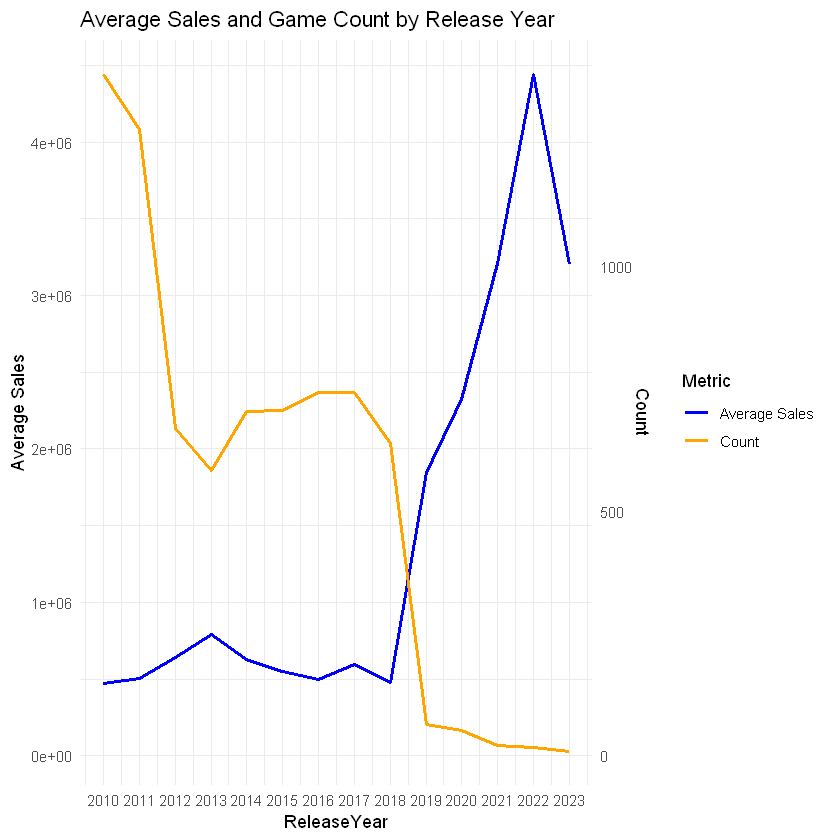

In [70]:
########################################################
# EDA - explore the dataset

# Calculate average sales and count of games released by year
summary_data <- data %>%
  group_by(ReleaseYear) %>%
  summarise(AvgSales = mean(TotalSales), Count = n())

# Define a scaling factor to make the Count values visible
count_scaling_factor <- max(summary_data$AvgSales) / max(summary_data$Count)

# Create a line graph
ggplot(summary_data, aes(x = ReleaseYear)) +
  geom_line(aes(y = AvgSales, color = "Average Sales"), size = 1) +
  geom_line(aes(y = Count * count_scaling_factor, color = "Count"), size = 1) +
  scale_color_manual(values = c("Average Sales" = "blue", "Count" = "orange")) +
  labs(title = "Average Sales and Game Count by Release Year",
       y = "Average Sales",
       color = "Metric") +
  theme_minimal() +
  scale_y_continuous(
    sec.axis = sec_axis(~./count_scaling_factor, name = "Count")
  ) +
  scale_x_continuous(breaks = unique(summary_data$ReleaseYear))

In [71]:
summary_data

ReleaseYear,AvgSales,Count
<int>,<dbl>,<int>
2010,469174.4,1393
2011,503859.4,1280
2012,639492.5,670
2013,790377.4,583
2014,628039.8,704
2015,550807.4,706
2016,501132.1,742
2017,594730.5,742
2018,478072.1,638


In [8]:
# Drop data from 2019 onwards to eliminate covid impact

data <- data %>%
  filter(ReleaseYear < 2019)

In [9]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

Rank             Title           Console         Publisher 
             7458              4789                18               693 
        Developer             Genre       ReleaseYear    ReleaseQuarter 
             1537                13                 9                 4 
     ReleaseMonth       ReleaseWeek        ReleaseDay    ReleaseWeekend 
               12                53                 7                 2 
       EndOfMonth        TotalSales YearsSinceRelease 
                2               475                 9

Handle Outliers, Transform Y to be normally distributed

Warning message:
"Use of `data$TotalSales` is discouraged.
ℹ Use `TotalSales` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


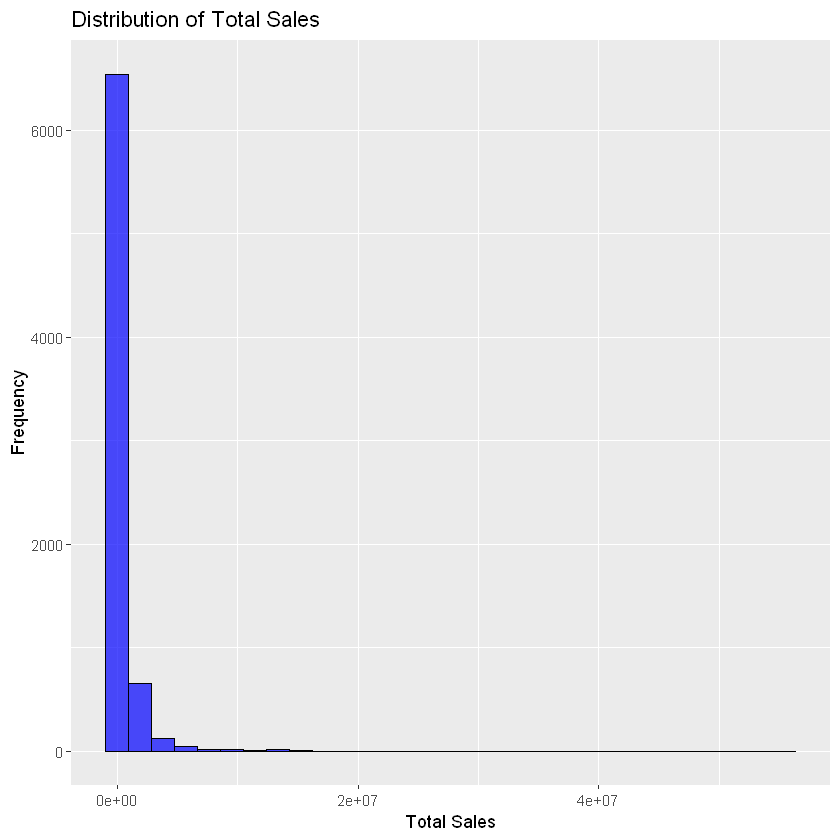

In [186]:
########################################################
# Check the distribution of dependent variable (TotalSales)

# Create a histogram using ggplot
ggplot(data, aes(x = data$TotalSales)) +
  geom_histogram(fill = "blue", color = "black", alpha = 0.7) +
  labs(
    title = "Distribution of Total Sales",
    x = "Total Sales",
    y = "Frequency"
  )

In [10]:
# Remove outliers

# Calculate the IQR for Total Sales
Q1 <- quantile(data$TotalSales, 0.25)
Q3 <- quantile(data$TotalSales, 0.75)
IQR_value <- Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound <- Q1 - 1.5 * IQR_value
upper_bound <- Q3 + 1.5 * IQR_value

# Identify outliers
outliers <- data$TotalSales[data$TotalSales < lower_bound | data$TotalSales > upper_bound]

# Display the number of outliers removed
cat("Number of outliers removed:", length(outliers), "\n")

Number of outliers removed: 925 


In [11]:
data = data[!(data$TotalSales < lower_bound | data$TotalSales > upper_bound), ]

In [12]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

Rank             Title           Console         Publisher 
             6533              4437                17               660 
        Developer             Genre       ReleaseYear    ReleaseQuarter 
             1465                13                 9                 4 
     ReleaseMonth       ReleaseWeek        ReleaseDay    ReleaseWeekend 
               12                53                 7                 2 
       EndOfMonth        TotalSales YearsSinceRelease 
                2                94                 9

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


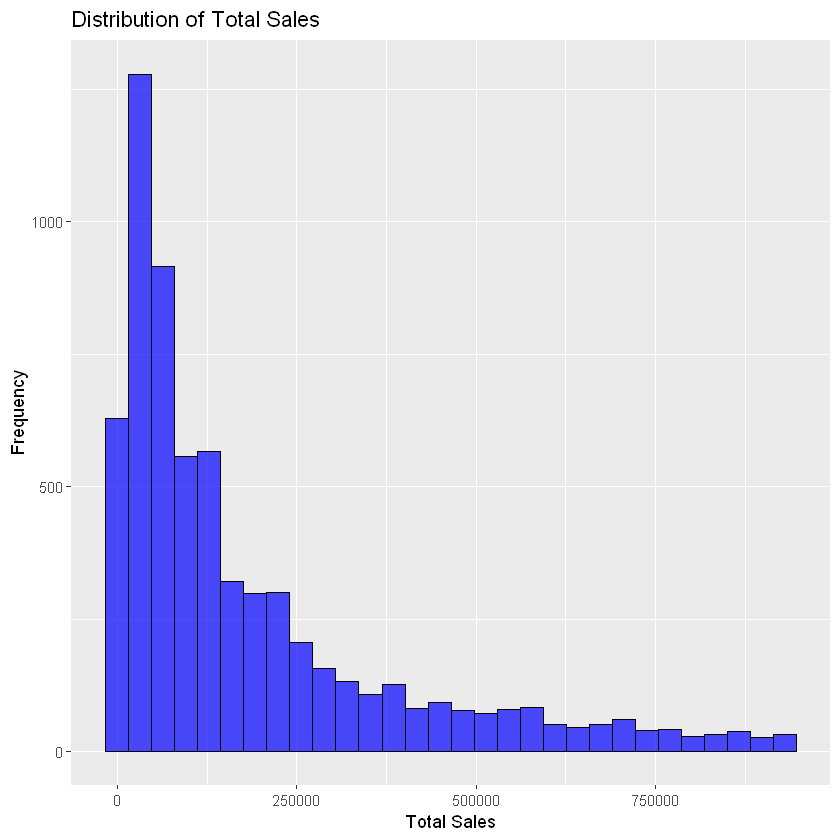

In [78]:
# Create a histogram using ggplot
ggplot(data, aes(x = data$TotalSales)) +
  geom_histogram(fill = "blue", color = "black", alpha = 0.7) +
  labs(
    title = "Distribution of Total Sales",
    x = "Total Sales",
    y = "Frequency"
  )

In [13]:
# Right-skewed: transform 'TotalSales' using log
data$log_transformed_total_sales <- log(data$TotalSales)

# Filter out infinite and missing values from the log-transformed variable
data <- data[is.finite(data$log_transformed_total_sales), ]

In [14]:
# Check for NA values in the log_transformed_total_sales column
na_count <- sum(is.na(data$log_transformed_total_sales))

# Check for NaN values in the log_transformed_total_sales column
nan_count <- sum(is.nan(data$log_transformed_total_sales))

# Check for Inf values in the log_transformed_total_sales column
inf_count <- sum(is.infinite(data$log_transformed_total_sales))

# Print the results
cat("Number of NA values in log_transformed_total_sales:", na_count, "\n")
cat("Number of NaN values in log_transformed_total_sales:", nan_count, "\n")
cat("Number of Inf values in log_transformed_total_sales:", inf_count, "\n")

Number of NA values in log_transformed_total_sales: 0 
Number of NaN values in log_transformed_total_sales: 0 
Number of Inf values in log_transformed_total_sales: 0 


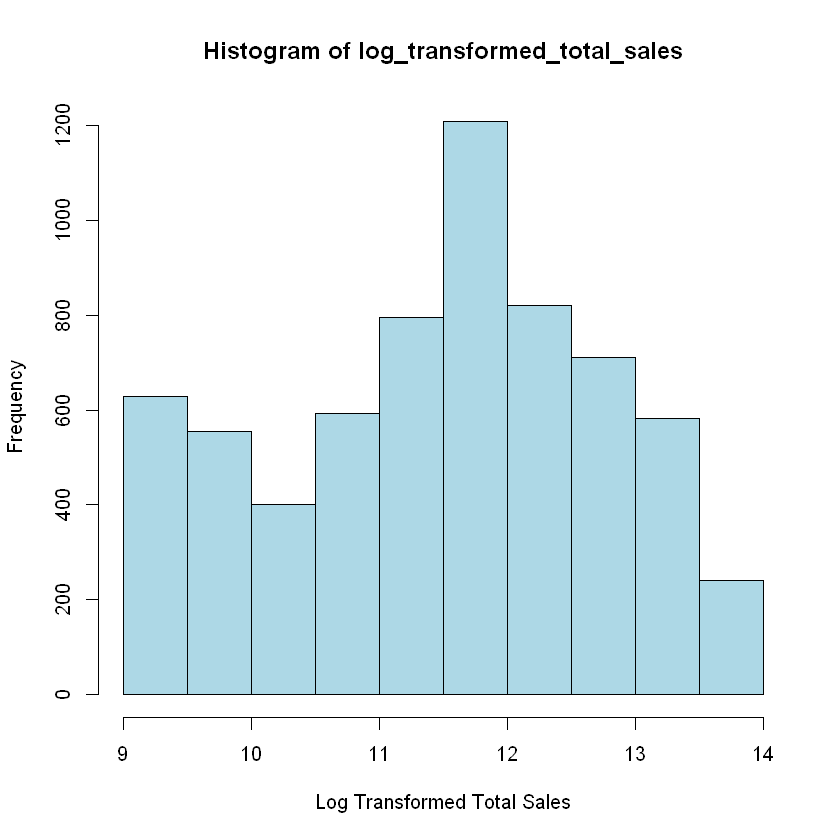

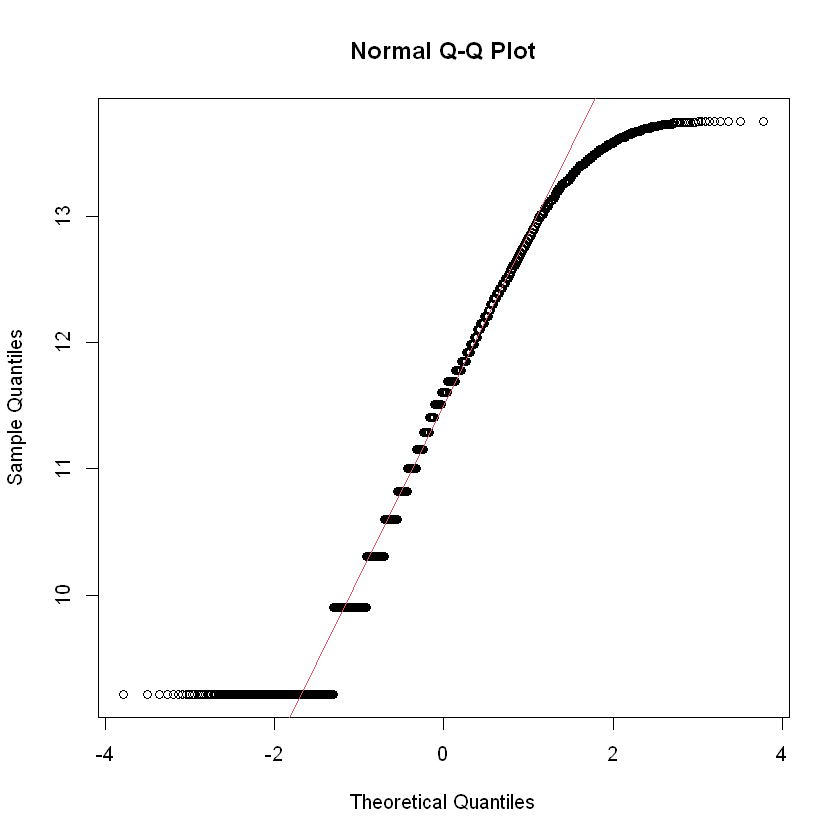

In [81]:
# Create a histogram for 'log_transformed_total_sales'
hist(data$log_transformed_total_sales, main="Histogram of log_transformed_total_sales", xlab="Log Transformed Total Sales", col="lightblue")

# Create a QQ plot for 'log_transformed_total_sales'
qqnorm(data$log_transformed_total_sales)
qqline(data$log_transformed_total_sales, col = 2)

# Display both the histogram and the QQ plot side by side
par(mfrow = c(2, 2))

,Rank,Title,Console,Genre,ReleaseYear,ReleaseQuarter,ReleaseMonth,ReleaseWeek,ReleaseDay,ReleaseWeekend,EndOfMonth,TotalSales,YearsSinceRelease,log_transformed_total_sales,Publisher,Developer,
6072,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
349,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,374,486


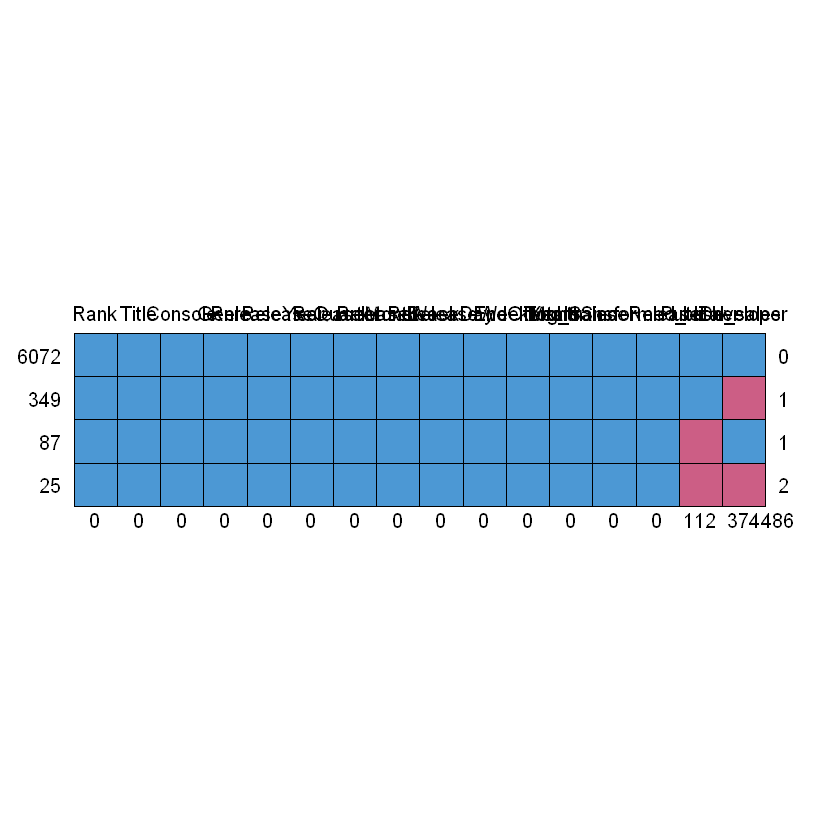

In [15]:
# Noted both Publisher & Developer also contains Unknown

# Replace 'Unknown' with NA
data$Developer[data$Developer == 'Unknown'] <- NA
data$Publisher[data$Publisher == 'Unknown'] <- NA

md.pattern(data)

In [ ]:
##### Little's Test #######
# Little's (1988) test statistic to assess if data is MCAR. 
# The null hypothesis (H0) : the data is MCAR

mcar_test(data)

In [17]:
# drop those records with Unknown

data = na.omit(data)

In [18]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

Rank                       Title 
                       6072                        4051 
                    Console                   Publisher 
                         17                         624 
                  Developer                       Genre 
                       1430                          13 
                ReleaseYear              ReleaseQuarter 
                          9                           4 
               ReleaseMonth                 ReleaseWeek 
                         12                          53 
                 ReleaseDay              ReleaseWeekend 
                          7                           2 
                 EndOfMonth                  TotalSales 
                          2                          94 
          YearsSinceRelease log_transformed_total_sales 
                          9                          94

ANOVA test - Do Publisher & Developer have any significant impact on the sales revenue?
Note: Due to large amount of publishers & developers, we run one-way ANOVA test in order to minimize computing power required

In [19]:
########################################################
# Does Publisher have an impact on the revenue?

#Pre-processing: change the '-' to '_' for TukeyHSD
# Replace hyphens with underscores in the "Publisher" column
data$Publisher <- gsub("-", "_", data$Publisher)

In [20]:
# Perform one-way ANOVA to identify significant publishers
anova.result_Publisher <- aov(log_transformed_total_sales ~ Publisher, data = data)
summary(anova.result_Publisher)

# p-value is less than 0.05, reject the null hypothesis - Publisher has an impact on the revenue

              Df Sum Sq Mean Sq F value Pr(>F)    
Publisher    623   3695   5.930   5.986 <2e-16 ***
Residuals   5448   5398   0.991                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [21]:
# Apply the Tukey HSD test
tukey_result = TukeyHSD(anova.result_Publisher)

In [22]:
# Change Tukey HSD test result to data frame
tukey_df <- as.data.frame(tukey_result$Publisher)

In [23]:
# Create a new column for Publisher names
tukey_df$Publisher <- rownames(tukey_df)

In [24]:
# View the dataframe
head(tukey_df,5)
names(tukey_df)

,diff,lwr,upr,p adj,Publisher
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
17_Bit-11 bit studios,1.2637194,-4.531326,7.058765,1.0000000,17_Bit-11 bit studios
1C Company-11 bit studios,0.6931472,-3.404569,4.790863,1.0000000,1C Company-11 bit studios
2K Games-11 bit studios,1.8698380,-1.107084,4.846759,0.9999990,2K Games-11 bit studios
2K Play-11 bit studios,1.4956368,-1.743892,4.735166,1.0000000,2K Play-11 bit studios
2K Sports-11 bit studios,1.8181419,-1.161791,4.798075,0.9999999,2K Sports-11 bit studios


[1] "diff"      "lwr"       "upr"       "p adj"     "Publisher"

In [25]:
# filter for p value < 0.05
significant_tukey_df <- tukey_df %>%
  filter(`p adj` < 0.05)

In [26]:
# Split the "Publisher" column into two columns
significant_tukey_df <- significant_tukey_df %>%
  separate(Publisher, into = c("Publisher1", "Publisher2"), sep = "-", extra = "merge", remove = FALSE)


In [27]:
# Create a vector of all unique significant publishers
all_significant_publishers <- unique(significant_tukey_df$Publisher1)

# Remove NAs (if any)
all_significant_publishers <- all_significant_publishers[!is.na(all_significant_publishers)]
length (all_significant_publishers)

all_significant_publishers


[1] 135

[1] "5pb"                                   
  [2] "Aksys Games"                           
  [3] "Alchemist"                             
  [4] "Arc System Works"                      
  [5] "Avanquest Software"                    
  [6] "Bandai Namco Games"                    
  [7] "Big Ben Interactive"                   
  [8] "Big Fish Games"                        
  [9] "Bigben Interactive"                    
 [10] "Cave"                                  
 [11] "Compile Heart"                         
 [12] "CyberFront"                            
 [13] "D3 Publisher"                          
 [14] "D3Publisher"                           
 [15] "Destineer"                             
 [16] "Dramatic Create"                       
 [17] "DTP Entertainment"                     
 [18] "Entergram"                             
 [19] "Focus Multimedia"                      
 [20] "FuRyu Corporation"                     
 [21] "Graffiti"                              
 [22] "Idea Factory"                          
 [23] "Irem Software Engineering"             
 [24] "Kadokawa Games"                        
 [25] "Kadokawa Shoten"                       
 [26] "Kalypso Media"                         
 [27] "Koei Tecmo"                            
 [28] "Little Orbit"                          
 [29] "Maximum Games"                         
 [30] "Merge Games"                           
 [31] "Microids"                              
 [32] "Milestone S.r.l."                      
 [33] "Namco Bandai Games"                    
 [34] "Nighthawk Interactive"                 
 [35] "Nippon Ichi Software"                  
 [36] "NIS America"                           
 [37] "Nordic Games"                          
 [38] "O_Games"                               
 [39] "Outright Games"                        
 [40] "Paradox Interactive"                   
 [41] "PQube"                                 
 [42] "Prototype"                             
 [43] "Quinrose"                              
 [44] "Rising Star Games"                     
 [45] "Russel"                                
 [46] "Soedesco"                              
 [47] "Storm City Games"                      
 [48] "System Soft"                           
 [49] "Tecmo Koei"                            
 [50] "THQ Nordic"                            
 [51] "Tru Blu Entertainment"                 
 [52] "UFO Interactive"                       
 [53] "Wired Productions"                     
 [54] "Zoo Games"                             
 [55] "Bethesda Softworks"                    
 [56] "Disney Interactive Studios"            
 [57] "EA Sports"                             
 [58] "Electronic Arts"                       
 [59] "Nintendo"                              
 [60] "Square Enix"                           
 [61] "THQ"                                   
 [62] "Warner Bros. Interactive Entertainment"
 [63] "Activision"                            
 [64] "Atari"                                 
 [65] "Atlus"                                 
 [66] "Bandai Namco Entertainment"            
 [67] "Capcom"                                
 [68] "City Interactive"                      
 [69] "Codemasters"                           
 [70] "Crave Entertainment"                   
 [71] "Daedalic Entertainment"                
 [72] "Deep Silver"                           
 [73] "Double Fine Productions"               
 [74] "Focus Home Interactive"                
 [75] "Frontier Developments"                 
 [76] "GameMill"                              
 [77] "Gearbox Software"                      
 [78] "Konami"                                
 [79] "Konami Digital Entertainment"          
 [80] "Level 5"                               
 [81] "LucasArts"                             
 [82] "Majesco"                               
 [83] "Microsoft Studios"                     
 [84] "Mojang"                                
 [85] "MTV Games"                             
 [86] "

In [28]:
########################################################
# Does Developer have an impact on the revenue?

#Pre-processing: change the '-' to '_' for TukeyHSD
# Replace hyphens with underscores in the "Developer" column
data$Developer <- gsub("-", "_", data$Developer)

In [29]:
# Perform one-way ANOVA to identify significant publishers
anova.result_Developer = aov(log_transformed_total_sales ~ Developer,data=data)
summary(anova.result_Developer)

# p-value is less than 0.05, reject the null hypothesis - Developer has an impact on the revenue


              Df Sum Sq Mean Sq F value Pr(>F)    
Developer   1429   4743   3.319   3.543 <2e-16 ***
Residuals   4642   4349   0.937                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [30]:
# Apply the Tukey HSD test
tukey_result_Developer = TukeyHSD(anova.result_Developer)

In [31]:
# Change Tukey HSD test result to data frame
tukey_df_Developer <- as.data.frame(tukey_result_Developer$Developer)

# Create a new column for Developer names
tukey_df_Developer$Developer <- rownames(tukey_df_Developer)

In [32]:
# filter for p value < 0.00025
significant_tukey_df_Developer <- tukey_df_Developer %>%
  filter(`p adj` < 0.00025)

In [33]:
# Split the "Developer" column into two columns
significant_tukey_df_Developer <- significant_tukey_df_Developer %>%
  separate(Developer, into = c("Developer1", "Developer2"), sep = "-", extra = "merge", remove = FALSE)


# Create a vector of all unique significant developers
all_significant_developers <- unique(significant_tukey_df_Developer$Developer1)

# Remove NAs (if any)
all_significant_developers <- all_significant_developers[!is.na(all_significant_developers)]
length (all_significant_developers)

all_significant_developers

[1] 120

[1] "Big Fish Games"           "Dramatic Create"         
  [3] "Idea Factory"             "QuinRose"                
  [5] "EA Canada"                "EA Tiburon"              
  [7] "Traveller's Tales"        "Arkane Studios"          
  [9] "Atlus"                    "Avalanche Software"      
 [11] "BioWare Corp."            "Codemasters"             
 [13] "Codemasters Birmingham"   "CyberConnect2"           
 [15] "Dimps Corporation"        "EA Bright Light"         
 [17] "EA Vancouver"             "Eidos Montreal"          
 [19] "Exient Entertainment"     "Gearbox Software"        
 [21] "High Moon Studios"        "Infinity Ward"           
 [23] "Intelligent Systems"      "IO Interactive"          
 [25] "Kojima Productions"       "Konami"                  
 [27] "Level 5"                  "MachineGames"            
 [29] "Omega Force"              "PlatinumGames"           
 [31] "SCE San Diego Studio"     "Sega"                    
 [33] "Square Enix"              "Tango Gameworks"         
 [35] "The Sims Studio"          "THQ"                     
 [37] "Toys for Bob"             "TT Fusion"               
 [39] "Ubisoft Montreal"         "Vicarious Visions"       
 [41] "Visual Concepts"          "Yuke's"                  
 [43] "Alchemist"                "Capcom"                  
 [45] "Firaxis Games"            "From Software"           
 [47] "Giants Software"          "Rebellion Developments"  
 [49] "Ubisoft"                  "Entergram"               
 [51] "Cave"                     "CyberFront"              
 [53] "FuRyu"                    "GSP"                     
 [55] "Kadokawa Games"           "Kadokawa Shoten"         
 [57] "KING Art Games"           "Koei Tecmo Games"        
 [59] "Little Orbit"             "Microids"                
 [61] "Nippon Ichi Software"     "Otomate"                 
 [63] "Prototype"                "Success"                 
 [65] "Crytek"                   "Team Ninja"              
 [67] "Ubisoft Montpellier"      "EA DICE"                 
 [69] "Griptonite Games"         "Harmonix Music Systems"  
 [71] "id Software"              "JAKKS Pacific"           
 [73] "Marvelous Entertainment"  "Monolith Soft"           
 [75] "Ninja Theory"             "PES Productions"         
 [77] "Pipeworks Software, Inc." "Spike"                   
 [79] "Sumo Digital"             "Telltale Games"          
 [81] "Ubisoft Reflections"      "Vigil Games"             
 [83] "EKO Software"             "Experience Inc."         
 [85] "FuRyu Corporation"        "Games Farm"              
 [87] "Gust"                     "Gusto Games"             
 [89] "HB Studios"               "HuneX"                   
 [91] "Inti Creates"             "Koei"                    
 [93] "Kylotonn Entertainment"   "Milestone S.r.l"         
 [95] "Milestone S.r.l."         "Monkey Bar Games"        
 [97] "Namco Bandai Games"       "Nippon Columbia"         
 [99] "Outright Games"           "Russel"                  
[101] "Spike Chunsoft"           "Starfish SD"             
[103] "Storm City Games"         "Studio Saizensen"        
[105] "System Soft"              "Tecmo Koei Games"        
[107] "Torus Games"              "UFO Interactive"         
[109] "UIG Entertainment"        "Weappy Studio"           
[111] "WizarBox"                 "Zoo Games"               
[113] "Nihon Falcom Corporation" "PopCap Games"            
[115] "Slightly Mad Studios"     "Volition Inc."           
[117] "WayForward Technologies"  "Zoe Mode"                
[119] "Supermassive Games Ltd."  "United Front Games"

Group Publisher & Developer

In [34]:
########################################################
# Explore grouping Publisher & Developer into Top 25 based on count frequency
'''
# Calculate the frequency of each Publisher
publisher_counts <- data %>%
  count(Publisher) %>%
  arrange(desc(n))

# Calculate the frequency of each Developer
developer_counts <- data %>%
  count(Developer) %>%
  arrange(desc(n))

# Extract the top 25 unique publishers and developers based on count frequency
top_publishers <- publisher_counts$Publisher %>%
  unique() %>%
  head(25)

top_developers <- developer_counts$Developer %>%
  unique() %>%
  head(25)

# View the top 25
print(top_publishers)
print(top_developers)
'''

 [1] "Namco Bandai Games"                    
 [2] "Activision"                            
 [3] "Ubisoft"                               
 [4] "Sega"                                  
 [5] "Tecmo Koei"                            
 [6] "Capcom"                                
 [7] "Electronic Arts"                       
 [8] "Namco Bandai"                          
 [9] "Warner Bros. Interactive Entertainment"
[10] "THQ"                                   
[11] "Konami"                                
[12] "Square Enix"                           
[13] "Nintendo"                              
[14] "Sony Computer Entertainment"           
[15] "EA Sports"                             
[16] "Konami Digital Entertainment"          
[17] "NIS America"                           
[18] "Deep Silver"                           
[19] "Idea Factory"                          
[20] "505 Games"                             
[21] "Focus Home Interactive"                
[22] "Atlus"                      

In [35]:
# Noted Data Inconsistencies under both Publisher & Developer columns
# Re-run Data Processing - to clean up data inconsistencies prior to grouping top 25

# Change 'Publisher' column to character
data$Publisher <- as.character(data$Publisher)

# Replace specified values
data$Publisher <- gsub('Namco Bandai Games|Namco Bandai|Namco|Namco Networks America Inc.', 'Bandai Namco', data$Publisher)
data$Publisher <- gsub('Warner Bros. Interactive Entertainment', 'Warner Bros. Interactive', data$Publisher)
data$Publisher <- gsub('Konami Digital Entertainment', 'Konami', data$Publisher)
data$Publisher <- gsub('THQ Nordic', 'THQ', data$Publisher)
data$Publisher <- gsub('Sony Computer Entertainment|Sony Computer Entertainment America|Sony Computer Entertainment Europe|Sony Interactive Entertainment|Sony Online Entertainment', 'Sony', data$Publisher)
data$Publisher <- gsub('Tecmo Koei', 'Tecmo', data$Publisher)
data$Publisher <- gsub('EA Sports', 'Electronic Arts', data$Publisher)

# Convert 'Publisher' back to factor
data$Publisher <- as.factor(data$Publisher)

In [36]:
# Change 'Developer' column to character
data$Developer <- as.character(data$Developer)

# Define a mapping of replacements as a named vector
developer_replacements <- c(
  'Atlus Co.|Atlus Co. / Lancarse' = 'Atlus',
  'Avalanche Software|Avalanche Studios' = 'Avalanche',
  'Bandai|Bandai Namco|Bandai Namco Games|Bandai Namco Studios|Namco|Namco Bandai|Namco Bandai Games|Namco Bandai Games / Celius|Namco Bandai Games America|Namco Tales Studio' = 'Bandai Namco',
  'Beenox Studios' = 'Beenox',
  'Behaviour Interactive Inc.' = 'Behaviour Interactive',
  'Black Lantern Studios, Inc.' = 'Black Lantern Studios',
  'Capcom / Dimps Corporation|Capcom Production Studio 1' = 'Capcom',
  'Codemasters Birmingham' = 'Codemasters',
  'Cyanide Studio|Cyanide Studios' = 'Cyanide',
  'EA|EA Black Box|EA Bright Light|EA Canada|EA DICE|EA Digital Illusions CE|EA Los Angeles|EA Montreal|EA Redwood Shores|EA Salt Lake|EA Sports|EA Tiburon|EA Vancouver' = 'Electronic Arts',
  'Gusto Games' = 'Gust',
  'Koei Tecmo Games' = 'Koei',
  'Konami Computer Entertainment Japan|Konami Digital Entertainment|Konami Digital Entertainment, Inc.' = 'Konami',
  'Level 5 / Armor Project|Level 5/Brownie Brown|Level 5/Studio Ghibli' = 'Level 5',
  'Nippon Ichi Software / Gust' = 'Nippon Ichi Software',
  'Sega CS3|Sega Sports R&D|Sega Studios Australia|Sega Studios, San Francisco|Sega WOW Overworks|Sega-AM2' = 'Sega',
  'Square Enix|Square-Enix' = 'Square',
  'THQ Australia Studios Pty Ltd.|THQ Digital Phoenix|THQ Nordic' = 'THQ',
  'Ubisoft Annecy|Ubisoft Barcelona|Ubisoft Bucharest|Ubisoft Milan|Ubisoft Montpellier|Ubisoft Montreal|Ubisoft Nagoya|Ubisoft Paris|Ubisoft Pune|Ubisoft Quebec|Ubisoft Quebec City|Ubisoft Reflections|Ubisoft Romania|Ubisoft San Francisco|Ubisoft Shanghai|Ubisoft Sofia|Ubisoft Toronto|Ubisoft Vancouver' = 'Ubisoft',
  'Visual Concepts, Ltd.' = 'Visual Concepts'
)

# Use str_replace_all to apply the replacements
data$Developer <- str_replace_all(data$Developer, developer_replacements)

# Convert 'Developer' back to factor
data$Developer <- as.factor(data$Developer)

In [37]:
data$Developer <- gsub('Bandai Namco Bandai Namco Games', 'Bandai Namco', data$Developer)
data$Developer <- gsub('Electronic Arts Canada', 'Electronic Arts', data$Developer)
data$Developer <- gsub('Electronic Arts Tiburon', 'Electronic Arts', data$Developer)

# Convert 'Developer' back to factor
data$Developer <- as.factor(data$Developer)

In [38]:
########################################################
# Re-group Top 25 after addressing data inconsistencies

# Calculate the frequency of each Publisher
publisher_counts <- data %>%
  count(Publisher) %>%
  arrange(desc(n))

# Calculate the frequency of each Developer
developer_counts <- data %>%
  count(Developer) %>%
  arrange(desc(n))

# Extract the top 25 unique publishers and developers based on count frequency
top_publishers <- publisher_counts$Publisher %>%
  unique() %>%
  head(25)

top_developers <- developer_counts$Developer %>%
  unique() %>%
  head(25)

# View the top 25
print(top_publishers)
print(top_developers)

 [1] Bandai Namco               Activision                
 [3] Electronic Arts            Ubisoft                   
 [5] Konami                     THQ                       
 [7] Warner Bros. Interactive   Sega                      
 [9] Tecmo                      Capcom                    
[11] Sony                       Square Enix               
[13] Nintendo                   NIS America               
[15] Deep Silver                Idea Factory              
[17] 505 Games                  Focus Home Interactive    
[19] Atlus                      Disney Interactive Studios
[21] Aksys Games                D3 Publisher              
[23] Xseed Games                2K Games                  
[25] 2K Sports                 
613 Levels: 11 bit studios 17_Bit 1C Company 2K Games 2K Play ... ZOV GAME STUDIO
 [1] Bandai Namco             Ubisoft                  Electronic Arts         
 [4] Capcom                   Konami                   Omega Force             
 [7] Idea Factory 

In [39]:
# Create a function to replace with "Others" if not in the top list
replace_with_others <- function(names, top_names) {
  names <- as.character(names)
  names[!names %in% top_names] <- "Others"
  names <- as.factor(names)
  return(names)
}

# Replace publishers and developers in the original data frame
data$Publisher <- replace_with_others(data$Publisher, top_publishers)
data$Developer <- replace_with_others(data$Developer, top_developers)

In [40]:
########################################################
# Check the number of distinct values for the variables

sapply(data, function(x) n_distinct(x))

Rank                       Title 
                       6072                        4051 
                    Console                   Publisher 
                         17                          26 
                  Developer                       Genre 
                         26                          13 
                ReleaseYear              ReleaseQuarter 
                          9                           4 
               ReleaseMonth                 ReleaseWeek 
                         12                          53 
                 ReleaseDay              ReleaseWeekend 
                          7                           2 
                 EndOfMonth                  TotalSales 
                          2                          94 
          YearsSinceRelease log_transformed_total_sales 
                          9                          94

In [41]:
str(data)

'data.frame':	6072 obs. of  16 variables:
 $ Rank                       : int  2703 2706 2707 2713 2716 2717 2722 2726 2731 2732 ...
 $ Title                      : chr  "Dust: An Elysian Tail" "Zombie Army Trilogy" "Borderlands 2" "EA Sports Active 2" ...
 $ Console                    : Factor w/ 21 levels "3DS","Amig","DS",..: 7 7 7 9 10 19 21 9 7 7 ...
 $ Publisher                  : Factor w/ 26 levels "2K Games","2K Sports",..: 18 18 1 12 25 25 2 4 18 18 ...
 $ Developer                  : Factor w/ 26 levels "Activision","Arc System Works",..: 17 17 17 17 23 23 26 17 17 17 ...
 $ Genre                      : Factor w/ 13 levels "Action","Action-Adventure",..: 6 10 10 12 1 1 12 1 10 7 ...
 $ ReleaseYear                : int  2013 2015 2012 2010 2014 2014 2013 2011 2010 2014 ...
 $ ReleaseQuarter             : int  2 2 3 4 4 4 4 4 2 4 ...
 $ ReleaseMonth               : int  5 6 9 11 11 11 11 10 6 11 ...
 $ ReleaseWeek                : int  21 23 38 47 46 46 47 43 27 46 ...
 $ Rele

Build LM model

In [43]:
########################################################
# Build LM model

lm_model1 = lm(log_transformed_total_sales ~ . -Rank - Title - TotalSales - log_transformed_total_sales , data = data)
summary(lm_model1)


Call:
lm(formula = log_transformed_total_sales ~ . - Rank - Title - 
    TotalSales - log_transformed_total_sales, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0987 -0.6717  0.0984  0.7155  2.7253 

Coefficients: (1 not defined because of singularities)
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         127.109808  16.753473   7.587 3.77e-14 ***
ConsoleAmig                           1.852095   1.039001   1.783 0.074707 .  
ConsoleDS                            -0.079850   0.070194  -1.138 0.255349    
ConsoleNS                            -0.011265   0.092027  -0.122 0.902579    
ConsolePC                             0.409908   0.060668   6.757 1.55e-11 ***
ConsolePS2                           -0.453185   0.162097  -2.796 0.005194 ** 
ConsolePS3                            0.352982   0.064893   5.439 5.56e-08 ***
ConsolePS4                            0.221697   0.068378   3.242 0.001192 ** 
ConsolePSN

In [51]:
# Extract the numerical predictor variables from your data
numerical_predictors <- data[, c("ReleaseYear", "ReleaseQuarter", "ReleaseMonth", "ReleaseWeek", "ReleaseDay", "YearsSinceRelease")]

# Identify collinear variables
cor_matrix <- cor(numerical_predictors)
cor_matrix 

,ReleaseYear,ReleaseQuarter,ReleaseMonth,ReleaseWeek,ReleaseDay,YearsSinceRelease
ReleaseYear,1.0000000000,-0.001559821,-0.007332259,-0.01747475,0.0004192302,-1.0000000000
ReleaseQuarter,-0.0015598206,1.000000000,0.971484852,0.96800913,-0.0105455251,0.0015598206
ReleaseMonth,-0.0073322590,0.971484852,1.000000000,0.99641304,-0.0032445816,0.0073322590
ReleaseWeek,-0.0174747471,0.968009128,0.996413036,1.00000000,-0.0168131239,0.0174747471
ReleaseDay,0.0004192302,-0.010545525,-0.003244582,-0.01681312,1.0000000000,-0.0004192302
YearsSinceRelease,-1.0000000000,0.001559821,0.007332259,0.01747475,-0.0004192302,1.0000000000


In [52]:
# Select the categorical variables to compare
categorical_variables <- data[, c("Console", "Publisher", "Developer", "Genre", "ReleaseWeekend", "EndOfMonth")]

# Create an empty matrix to store p-values from chi-square tests
p_values_matrix <- matrix(NA, nrow = ncol(categorical_variables), ncol = ncol(categorical_variables))
rownames(p_values_matrix) <- colnames(p_values_matrix) <- names(categorical_variables)

# Perform chi-square tests for all pairs of categorical variables
for (i in 1:(ncol(categorical_variables) - 1)) {
  for (j in (i + 1):ncol(categorical_variables)) {
    cross_tab <- table(categorical_variables[, i], categorical_variables[, j])
    chi_square_test <- chisq.test(cross_tab)
    p_values_matrix[i, j] <- p_values_matrix[j, i] <- chi_square_test$p.value
  }
}

# Print or view the p-values matrix
print(p_values_matrix)

Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(cross_tab):
"Chi-squared approximation may be incorrect"


               Console    Publisher    Developer       Genre ReleaseWeekend
Console             NA          NaN          NaN         NaN            NaN
Publisher          NaN           NA 0.0000000000 0.000000000   1.421848e-20
Developer          NaN 0.000000e+00           NA 0.000000000   6.278826e-04
Genre              NaN 0.000000e+00 0.0000000000          NA   7.414458e-02
ReleaseWeekend     NaN 1.421848e-20 0.0006278826 0.074144582             NA
EndOfMonth         NaN 2.376634e-07 0.0002475546 0.006037509   5.707397e-16
                 EndOfMonth
Console                 NaN
Publisher      2.376634e-07
Developer      2.475546e-04
Genre          6.037509e-03
ReleaseWeekend 5.707397e-16
EndOfMonth               NA


In [ ]:
# Set max.print to Infinity to ensure all coefficients are displayed
options(max.print = 9999999)

# Print the summary using stargazer
stargazer(lm_model1, type = "text", out = "summary_table.txt")

In [58]:
########################################################
# Build LM model

lm_model2 = lm(log_transformed_total_sales ~ Console + Genre + ReleaseYear + ReleaseWeek + ReleaseDay + ReleaseWeekend + EndOfMonth, data = data)
summary(lm_model2)


Call:
lm(formula = log_transformed_total_sales ~ Console + Genre + 
    ReleaseYear + ReleaseWeek + ReleaseDay + ReleaseWeekend + 
    EndOfMonth, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3891 -0.7601  0.0502  0.8309  2.8864 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.713e+02  1.770e+01   9.676  < 2e-16 ***
ConsoleAmig             1.472e+00  1.133e+00   1.299 0.193944    
ConsoleDS              -2.871e-01  7.533e-02  -3.811 0.000140 ***
ConsoleNS              -2.203e-01  9.808e-02  -2.246 0.024740 *  
ConsolePC               1.698e-01  6.244e-02   2.720 0.006550 ** 
ConsolePS2             -6.316e-01  1.743e-01  -3.623 0.000294 ***
ConsolePS3              3.242e-01  6.801e-02   4.767 1.92e-06 ***
ConsolePS4              9.106e-02  7.133e-02   1.277 0.201802    
ConsolePSN             -5.633e-01  4.639e-01  -1.214 0.224656    
ConsolePSP             -3.943e-01  7.947e-02  -4.961 7.20e-07 ***
Cons

In [59]:
########################################################
# Build LM model

lm_model3 = lm(log_transformed_total_sales ~ Console + Publisher + Genre + ReleaseYear + ReleaseWeek + ReleaseDay + ReleaseWeekend + EndOfMonth, data = data)
summary(lm_model3)


Call:
lm(formula = log_transformed_total_sales ~ Console + Publisher + 
    Genre + ReleaseYear + ReleaseWeek + ReleaseDay + ReleaseWeekend + 
    EndOfMonth, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6323 -0.6797  0.0951  0.7319  2.8414 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          1.295e+02  1.674e+01   7.736 1.20e-14 ***
ConsoleAmig                          1.844e+00  1.053e+00   1.751 0.079945 .  
ConsoleDS                           -1.124e-01  7.081e-02  -1.587 0.112615    
ConsoleNS                           -4.643e-02  9.257e-02  -0.502 0.615983    
ConsolePC                            3.964e-01  6.064e-02   6.537 6.81e-11 ***
ConsolePS2                          -4.554e-01  1.637e-01  -2.782 0.005426 ** 
ConsolePS3                           3.509e-01  6.490e-02   5.408 6.63e-08 ***
ConsolePS4                           2.086e-01  6.856e-02   3.043 0.002355 ** 
Console

In [62]:
########################################################
# Build LM model

lm_model4 = lm(log_transformed_total_sales ~ Console + Developer + Genre + ReleaseYear + ReleaseQuarter + ReleaseDay + ReleaseWeekend + EndOfMonth, data = data)
summary(lm_model4)


Call:
lm(formula = log_transformed_total_sales ~ Console + Developer + 
    Genre + ReleaseYear + ReleaseQuarter + ReleaseDay + ReleaseWeekend + 
    EndOfMonth, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1016 -0.7213  0.0755  0.7740  2.8713 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       164.733777  17.272305   9.537  < 2e-16 ***
ConsoleAmig                         1.505819   1.098100   1.371 0.170334    
ConsoleDS                          -0.244604   0.073540  -3.326 0.000886 ***
ConsoleNS                          -0.178336   0.096112  -1.855 0.063574 .  
ConsolePC                           0.193340   0.061793   3.129 0.001764 ** 
ConsolePS2                         -0.591898   0.170471  -3.472 0.000520 ***
ConsolePS3                          0.375203   0.066977   5.602 2.21e-08 ***
ConsolePS4                          0.128011   0.070119   1.826 0.067955 .  
ConsolePSN            

In [63]:
########################################################
# Build LM model

lm_model5 = lm(log_transformed_total_sales ~ Console + Developer + Genre + YearsSinceRelease + ReleaseQuarter + ReleaseDay + ReleaseWeekend + EndOfMonth, data = data)
summary(lm_model5)


Call:
lm(formula = log_transformed_total_sales ~ Console + Developer + 
    Genre + YearsSinceRelease + ReleaseQuarter + ReleaseDay + 
    ReleaseWeekend + EndOfMonth, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1016 -0.7213  0.0755  0.7740  2.8713 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       11.447017   0.210996  54.252  < 2e-16 ***
ConsoleAmig                        1.505819   1.098100   1.371 0.170334    
ConsoleDS                         -0.244604   0.073540  -3.326 0.000886 ***
ConsoleNS                         -0.178336   0.096112  -1.855 0.063574 .  
ConsolePC                          0.193340   0.061793   3.129 0.001764 ** 
ConsolePS2                        -0.591898   0.170471  -3.472 0.000520 ***
ConsolePS3                         0.375203   0.066977   5.602 2.21e-08 ***
ConsolePS4                         0.128011   0.070119   1.826 0.067955 .  
ConsolePSN               

In [64]:
########################################################
# Build LM model

lm_model6 = lm(log_transformed_total_sales ~ Console + Developer + Publisher + Genre + YearsSinceRelease + ReleaseQuarter + ReleaseDay + ReleaseWeekend + EndOfMonth, data = data)
summary(lm_model6)


Call:
lm(formula = log_transformed_total_sales ~ Console + Developer + 
    Publisher + Genre + YearsSinceRelease + ReleaseQuarter + 
    ReleaseDay + ReleaseWeekend + EndOfMonth, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1347 -0.6710  0.0974  0.7142  2.7232 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         11.592030   0.257268  45.058  < 2e-16 ***
ConsoleAmig                          1.864022   1.038635   1.795 0.072755 .  
ConsoleDS                           -0.081204   0.070178  -1.157 0.247273    
ConsoleNS                           -0.012249   0.091997  -0.133 0.894084    
ConsolePC                            0.412596   0.060641   6.804 1.12e-11 ***
ConsolePS2                          -0.448279   0.162074  -2.766 0.005694 ** 
ConsolePS3                           0.353466   0.064890   5.447 5.32e-08 ***
ConsolePS4                           0.224811   0.068349   3.289 0.001011

### UNTIL HERE

Warning message in predict.lm(lm_model5, data):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in abline(lm_model5, col = "red"):
"only using the first two of 1598 regression coefficients"


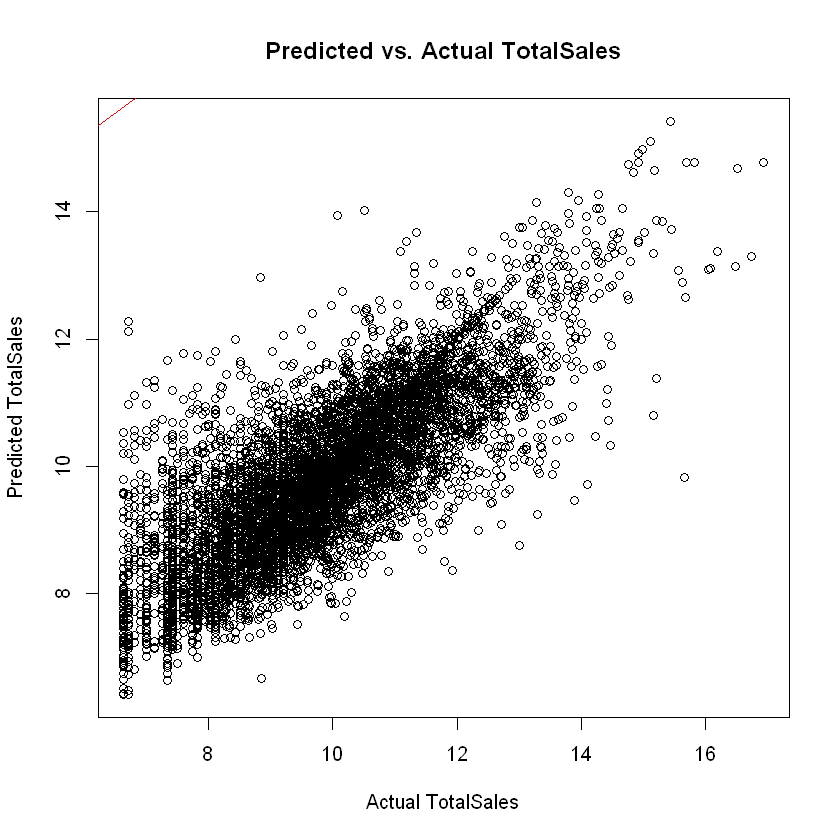

In [25]:
# Model 5 has highest R2 and adjusted R2 score among all the models
# Make predictions using the lm model
predicted_values <- predict(lm_model5, data)

# Create a scatterplot to compare predicted vs actual TotalSales
plot(data$log_transformed_yearly_sales, predicted_values, main = "Predicted vs. Actual TotalSales", 
     xlab = "Actual TotalSales", ylab = "Predicted TotalSales")

# Add the fitted line from the lm model
abline(lm_model5, col = "red")

Try splitting the dataset - and evaluate the errors

In [ ]:
########################################################
# Build LM model - split into 70-30 training-testing dataset

# Set a random seed for reproducibility
set.seed(123)

# Split the data into a training set (70%) and a test set (30%)
split <- sample.split(data$log_transformed_yearly_sales, SplitRatio = 0.7)
training_data <- subset(data, split == TRUE)
test_data <- subset(data, split == FALSE)

# Fit a linear regression (lm) model to the training set
lm_model7 = lm(log_transformed_yearly_sales ~ Console + Developer + Genre + ReleaseMonth + ReleaseWeekend, data = training_data)
summary(lm_model7)


In [ ]:
# Make predictions on the test set
predicted_values <- predict(lm_model7, newdata = test_data)

In [ ]:
## Unable to predict due to developer not covered in the training dataset
# Need to simplify the developer further

In [84]:
########################################################
# Build LM model - split into 80-20 training-testing dataset

# Set a random seed for reproducibility
set.seed(25)

# Split the data into a training set (80%) and a test set (20%)
split <- sample.split(data_v2$log_transformed_yearly_sales, SplitRatio = 0.8 )
training_data_v2 <- subset(data_v2, split == TRUE)
test_data_v2 <- subset(data_v2, split == FALSE)

In [ ]:
# Fit a linear regression (lm) model to the training set
lm_model8 = lm(log_transformed_yearly_sales ~ Console + Publisher + Developer + Genre + ReleaseMonth + ReleaseWeekend, data = training_data_v2)
summary(lm_model8)

In [ ]:
# R2 drops to 38.09%; Adj R2 drop to 37.23%
# All X variables are significant

In [ ]:
# Fit a linear regression (lm) model to the training set
lm_model9 = lm(log_transformed_yearly_sales ~ Console + Developer + Genre + ReleaseMonth + ReleaseWeekend, data = training_data_v2)
summary(lm_model9)

In [ ]:
# Fit a linear regression (lm) model to the training set
lm_model10 = lm(log_transformed_yearly_sales ~ Console + Publisher + Genre  + ReleaseMonth + ReleaseDay + ReleaseWeekend, data = training_data_v2)
summary(lm_model10)

In [86]:
# Make predictions on the test set using log-transformed data
predicted_log_values <- predict(lm_model8, newdata = test_data_v2)

# Convert log-transformed predictions back to the original scale
predicted_values <- exp(predicted_log_values)


In [87]:
# Calculate various error metrics on the original scale
errors <- test_data_v2$YearlySales - predicted_values
sum_of_errors <- sum(errors)
mean_absolute_deviation <- mean(abs(errors))
mean_percentage_error <- mean(errors) * 100  # Already on the original scale
mean_squared_error <- mean(errors^2)
standard_error <- sqrt(mean_squared_error)
mean_absolute_percentage_error <- mean(abs(errors)) * 100

# Print the error metrics
cat("Sum of Errors:", sum_of_errors, "\n")
cat("Mean Absolute Deviation:", mean_absolute_deviation, "\n")
cat("Mean Percentage Error:", mean_percentage_error, "%\n")
cat("Mean Squared Error:", mean_squared_error, "\n")
cat("Standard Error:", standard_error, "\n")
cat("Mean Absolute Percentage Error:", mean_absolute_percentage_error, "%\n")

Sum of Errors: 5900104 
Mean Absolute Deviation: 25425.11 
Mean Percentage Error: 460945.7 %
Mean Squared Error: 5588013505 
Standard Error: 74753.02 
Mean Absolute Percentage Error: 2542511 %


The lm model's performance is not that great - to explore using NN

In [50]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model <- keras_model_sequential()

# Add an input layer
model %>% 
  layer_dense(units = 64, input_shape = c(11), activation = "relu")

# Add one or more hidden layers
model %>%
  layer_dense(units = 32, activation = "relu") %>%
  layer_dense(units = 16, activation = "relu")

# Add an output layer
model %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model
model %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [51]:
summary (model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense (Dense)                      (None, 64)                      768         
 dense_2 (Dense)                    (None, 32)                      2080        
 dense_1 (Dense)                    (None, 16)                      528         
 dense_3 (Dense)                    (None, 1)                       17          
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
________________________________________________________________________________


In [88]:
# Exclude specified columns by selecting all columns except the ones to be excluded
x_train <- training_data_v2[, !names(training_data_v2) %in% c("Rank", "Title", "TotalSales", "YearsSinceRelease", "YearlySales", "log_transformed_yearly_sales")]
x_test <- test_data_v2[, !names(test_data_v2) %in% c("Rank", "Title", "TotalSales", "YearsSinceRelease", "YearlySales", "log_transformed_yearly_sales")]

In [89]:
# Train the model
history = keras::fit(model, data.matrix(x_train), data.matrix(training_data_v2$YearlySales), epochs = 100, batch_size = 100, verbose = 1)

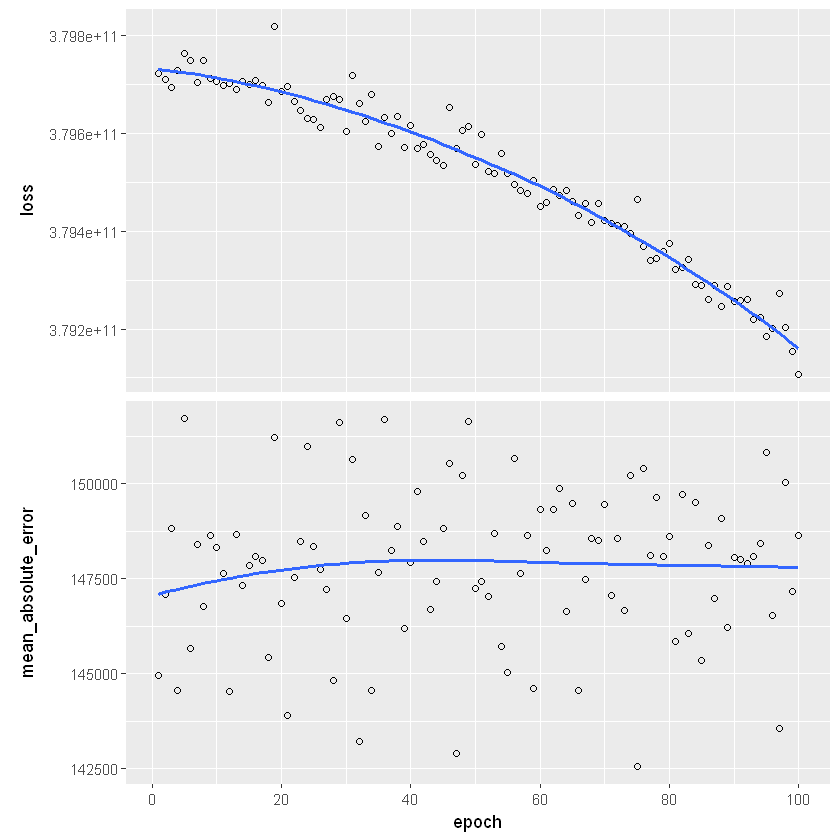

In [90]:
plot(history)

In [91]:
# Evaluate the model
eval_metrics <- model %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data_v2$YearlySales)  # Target variable for testing
)

In [92]:
# Print the evaluation metrics
print(eval_metrics)

               loss mean_absolute_error 
       1.021147e+10        9.078630e+04 


In [ ]:
# LM Model: Mean Squared Error: 5900104  & Mean Absolute Deviation: 25425.11
# NN Model: loss: ard 10 & mean_absolute_error: ard 9
# NN Model is of better predictor!

In [93]:
# Generate predictions using your trained model
predictions <- model %>% predict(data.matrix(x_test))

# Organize results into a data frame
results <- data.frame(Actual_YearlySales = test_data_v2$YearlySales, Predicted_YearlySales = as.vector(predictions))

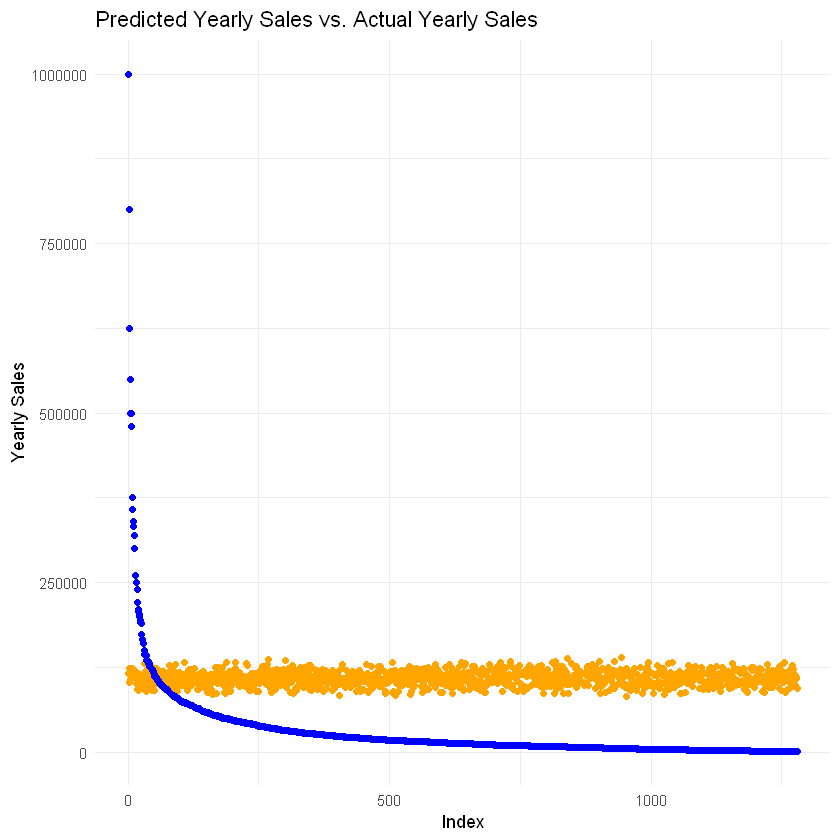

In [94]:
# Create a scatter plot for both predicted and actual values using different colors
ggplot(results, aes(x = seq_along(Actual_YearlySales))) +
  geom_point(aes(y = Predicted_YearlySales), color = "orange") +
  geom_point(aes(y = Actual_YearlySales), color = "blue") +
  labs(x = "Index", y = "Yearly Sales") +
  ggtitle("Predicted Yearly Sales vs. Actual Yearly Sales") +
  theme_minimal()

In [120]:
# Export to excel

write_xlsx(results, path = "NN_results.xlsx")

In [64]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model2 <- keras_model_sequential()

# Add an input layer
model2 %>% 
  layer_dense(units = 72, input_shape = c(11), activation = "relu")

# Add one or more hidden layers
model2 %>%
  layer_dense(units = 50, activation = "relu") %>%
  layer_dense(units = 8, activation = "relu")

# Add an output layer
model2 %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model
model2 %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [65]:
summary(model2)

Model: "sequential_2"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_8 (Dense)                    (None, 72)                      864         
 dense_10 (Dense)                   (None, 50)                      3650        
 dense_9 (Dense)                    (None, 8)                       408         
 dense_11 (Dense)                   (None, 1)                       9           
Total params: 4,931
Trainable params: 4,931
Non-trainable params: 0
________________________________________________________________________________


In [66]:
# Train the model
history2 = keras::fit(model2, data.matrix(x_train), data.matrix(training_data_v2$YearlySales), epochs = 100, batch_size = 100, verbose = 1)

In [67]:
# Evaluate the model
eval_metrics2 <- model2 %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data_v2$YearlySales)  # Target variable for testing
)

In [68]:
# Print the evaluation metrics
print(eval_metrics2)

               loss mean_absolute_error 
       1.024168e+10        9.142907e+04 


In [ ]:
# Increasing the hyperparameter reduce the loss further

In [69]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model3 <- keras_model_sequential()

# Add an input layer
model3 %>% 
  layer_dense(units = 64, input_shape = c(11), activation = "relu")

# Add one or more hidden layers
model3 %>%
  layer_dense(units = 32, activation = "relu") %>%
  layer_dense(units = 16, activation = "relu")

# Add an output layer
model3 %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model
model3 %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [70]:
# Train the model
history3 = keras::fit(model3, data.matrix(x_train), data.matrix(training_data_v2$YearlySales), epochs = 500, batch_size = 100, verbose = 1)

In [71]:
# Evaluate the model
eval_metrics3 <- model3 %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data_v2$YearlySales)  # Target variable for testing
)

In [72]:
# Print the evaluation metrics
print(eval_metrics3)

               loss mean_absolute_error 
       1.459941e+10        9.184043e+04 


In [ ]:
# Increasing number of iterations improves the model's performance too

In [73]:
########################################################
# Build a NN model

# Create a Keras Sequential model
model4 <- keras_model_sequential()

# Add an input layer
model4 %>% 
  layer_dense(units = 64, input_shape = c(11), activation = "relu")

# Add one or more hidden layers
model4 %>%
  layer_dense(units = 32, activation = "relu") %>%
  layer_dense(units = 16, activation = "relu")

# Add an output layer
model4 %>%
  layer_dense(units = 1)  # To predict 'TotalSales'

# Compile the model
model4 %>%
  compile(
    loss = "mean_squared_error",
    optimizer = optimizer_adam(),
    metrics = list("mean_absolute_error")
  )

In [95]:
# Train the model
history4 = keras::fit(model4, data.matrix(x_train), data.matrix(training_data_v2$YearlySales), epochs = 200, batch_size = 100, verbose = 1)

In [96]:
# Evaluate the model
eval_metrics4 <- model4 %>% evaluate(
  x = data.matrix(x_test),  # Independent variables for testing
  y = data.matrix(test_data_v2$YearlySales)  # Target variable for testing
)

In [97]:
# Print the evaluation metrics
print(eval_metrics4)

               loss mean_absolute_error 
       1.463605e+10        9.674402e+04 


In [98]:
# Generate predictions using your trained model
predictions_NN4 <- model4 %>% predict(data.matrix(x_test))

# Organize results into a data frame
results_NN4 <- data.frame(Actual_YearlySales = test_data_v2$YearlySales, Predicted_YearlySales = as.vector(predictions_NN4))

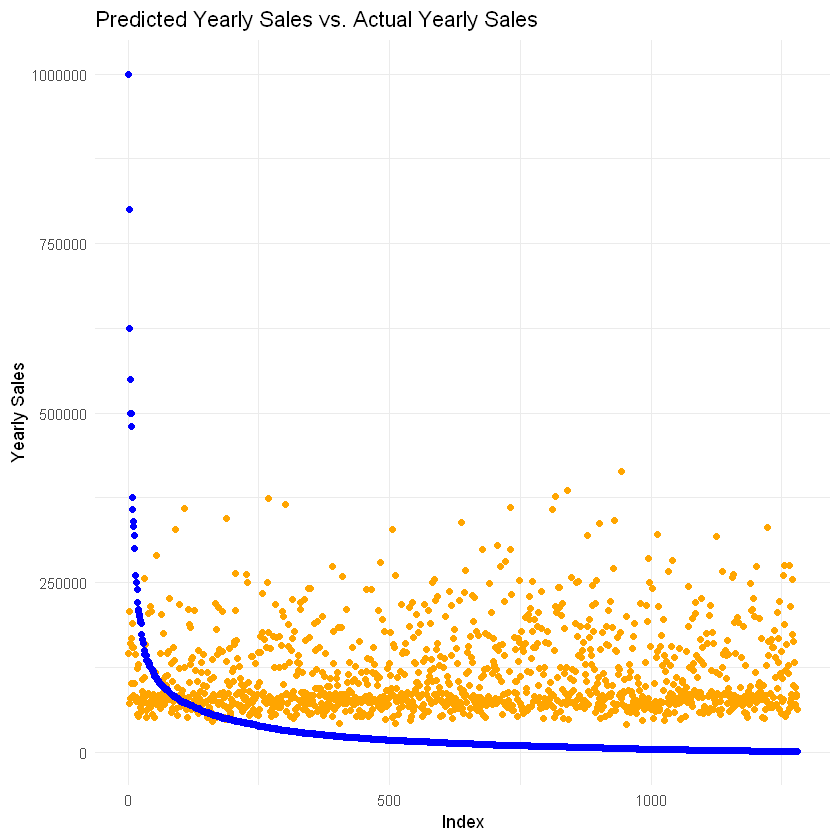

In [99]:
# Create a scatter plot for both predicted and actual values using different colors
ggplot(results_NN4, aes(x = seq_along(Actual_YearlySales))) +
  geom_point(aes(y = Predicted_YearlySales), color = "orange") +
  geom_point(aes(y = Actual_YearlySales), color = "blue") +
  labs(x = "Index", y = "Yearly Sales") +
  ggtitle("Predicted Yearly Sales vs. Actual Yearly Sales") +
  theme_minimal()